<a href="https://colab.research.google.com/github/AnnaPaulaFigueiredo/Imersao-Dados-Alura/blob/main/AnaliseExporadica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

data = pd.read_csv(fonte)

In [ ]:
# Criando uma nova colunas para fazer a análise de notas totais
exam = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

data["NU_NOTA_TOTAL"] = data[exam].sum(axis=1)

# Eliminando os alunos com nota total igual a zero, pois pode enviesar a análise
data = data.query("NU_NOTA_TOTAL != 0")
data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


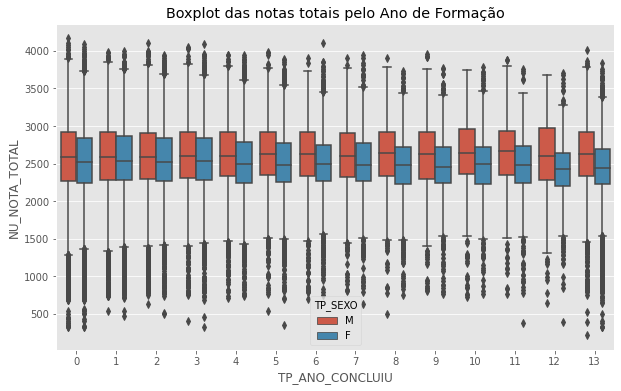

In [ ]:
# No passado era mais difícil para as mulheres, e quanto mais atual, mais espaço vem ganhando tbm
plt.figure(figsize=(10,6))
plt.title("Boxplot das notas totais pelo Ano de Formação")
sns.boxplot(x = "TP_ANO_CONCLUIU", y = "NU_NOTA_TOTAL", data =data, hue="TP_SEXO")

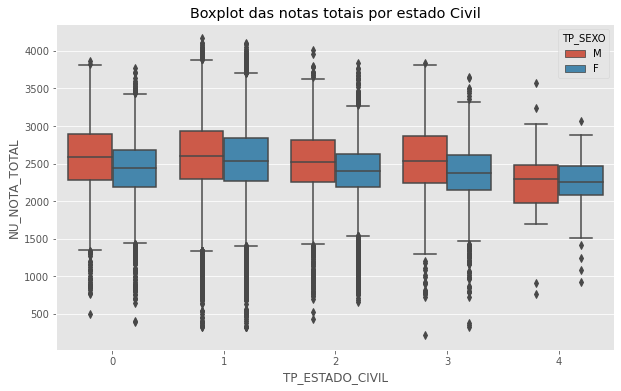

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot das notas totais por estado Civil")
sns.boxplot(x = "TP_ESTADO_CIVIL", y = "NU_NOTA_TOTAL", data =data, hue="TP_SEXO")

# 0 Não Informado
# 1 solteiro
# 2 casado
# 3 divorciado
# 4 viúvo

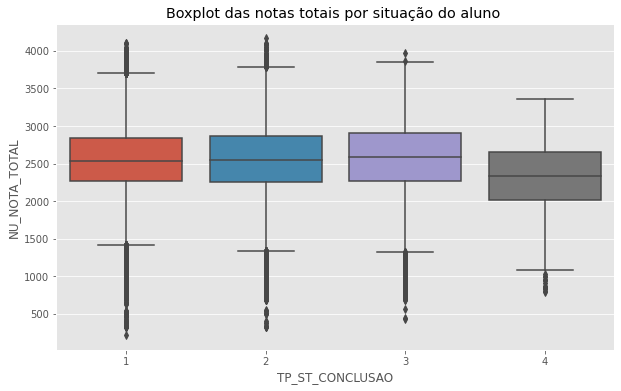

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot das notas totais por situação do aluno ")
sns.boxplot(x = "TP_ST_CONCLUSAO", y = "NU_NOTA_TOTAL", data =data)

# 1 concluiu
# 2 cursando e concluirá em 2019
# 3 cursando e concluirá após 2019
# 4 não concluiu nem cursa ensino médio 

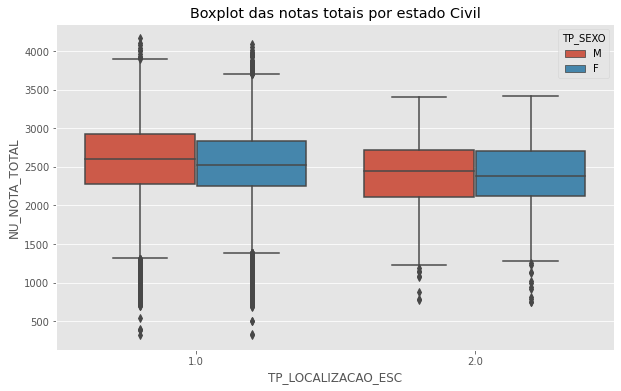

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot das notas totais por estado Civil")
sns.boxplot(x = "TP_LOCALIZACAO_ESC", y = "NU_NOTA_TOTAL", data =data, hue="TP_SEXO")
# 1 urbano
# 2 rural

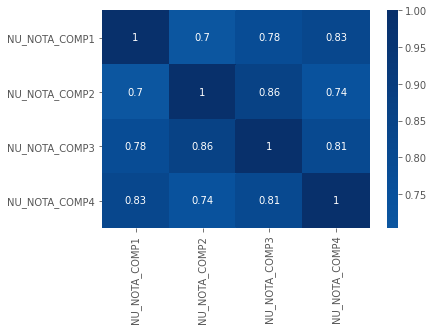

In [ ]:
# Se a pessoa vai bem em uma competencia, a nota dela tem chance de ser maior 
competences = ["NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4"]

corr = data[competences].corr()
sns.heatmap(corr, cmap="Blues", center=0, annot=True)

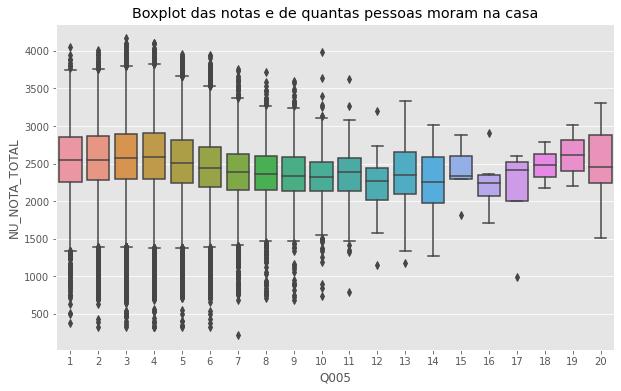

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot das notas e de quantas pessoas moram na casa")
sns.boxplot(x = "Q005", y = "NU_NOTA_TOTAL", data =data)



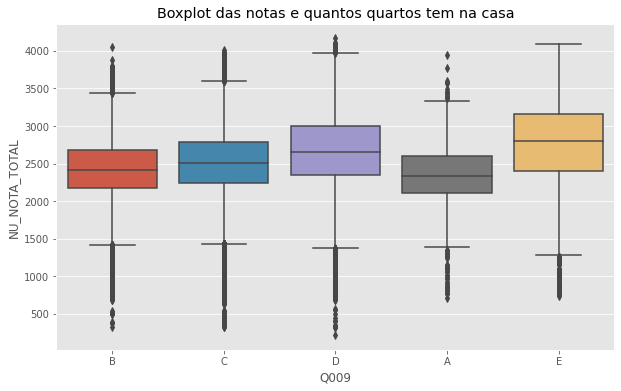

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot das notas e quantos quartos tem na casa")
sns.boxplot(x = "Q009", y = "NU_NOTA_TOTAL", data =data)

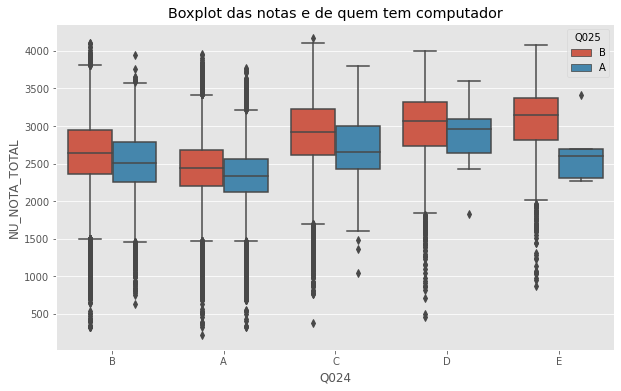

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot das notas e de quem tem computador")
sns.boxplot(x = "Q024", y = "NU_NOTA_TOTAL", data =data, hue="Q025")

# todo mundo da amostra tem computador CURIOSO DE MAAAAIS
# ALgumas pessoas tem pc tem internet outras não
# quem tem mais computador em casa, tem notas mais altas

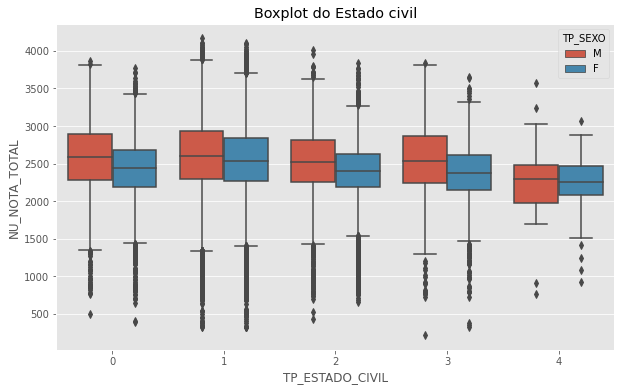

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot do Estado civil")
sns.boxplot(x = "TP_ESTADO_CIVIL", y = "NU_NOTA_TOTAL", data =data, hue="TP_SEXO")


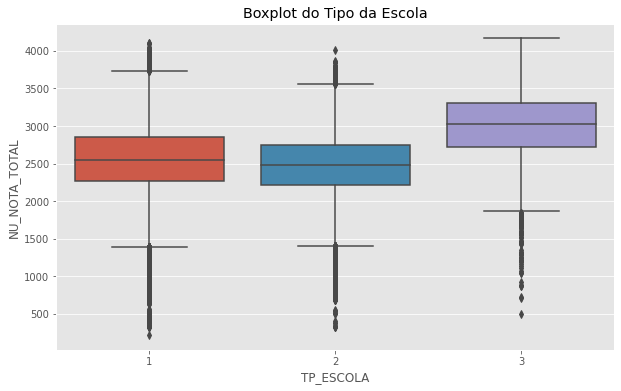

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot do Tipo da Escola")
sns.boxplot(x = "TP_ESCOLA", y = "NU_NOTA_TOTAL", data =data)
# 1 Não respondeu
# 2 Pública
# 3 Privada

In [ ]:
# Quem se perde na redação, perde mais por conta de quê ???

data["TP_STATUS_REDACAO"].value_counts().sort_values(ascending=False)
 
# 4 -> Em branco
# 6 -> Fuga do tema
# 3 -> Cópia do texto motivador



1.0    94538
4.0     1407
6.0      912
3.0      549
8.0      216
2.0      144
9.0      134
7.0      102
Name: TP_STATUS_REDACAO, dtype: int64

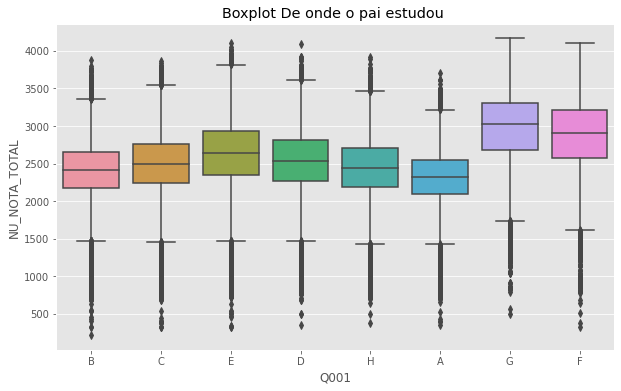

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot De onde o pai estudou ")
sns.boxplot(x = "Q001", y = "NU_NOTA_TOTAL", data =data)

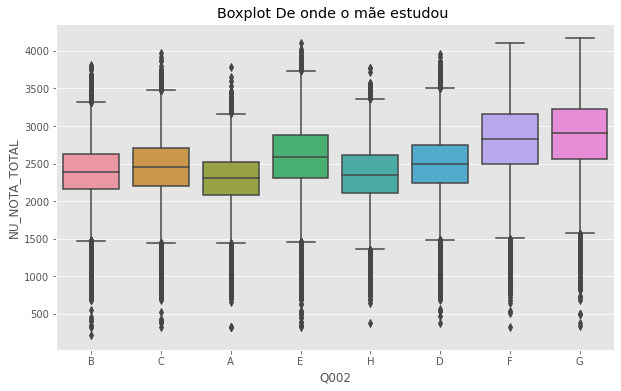

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot De onde o mãe estudou ")
sns.boxplot(x = "Q002", y = "NU_NOTA_TOTAL", data =data)

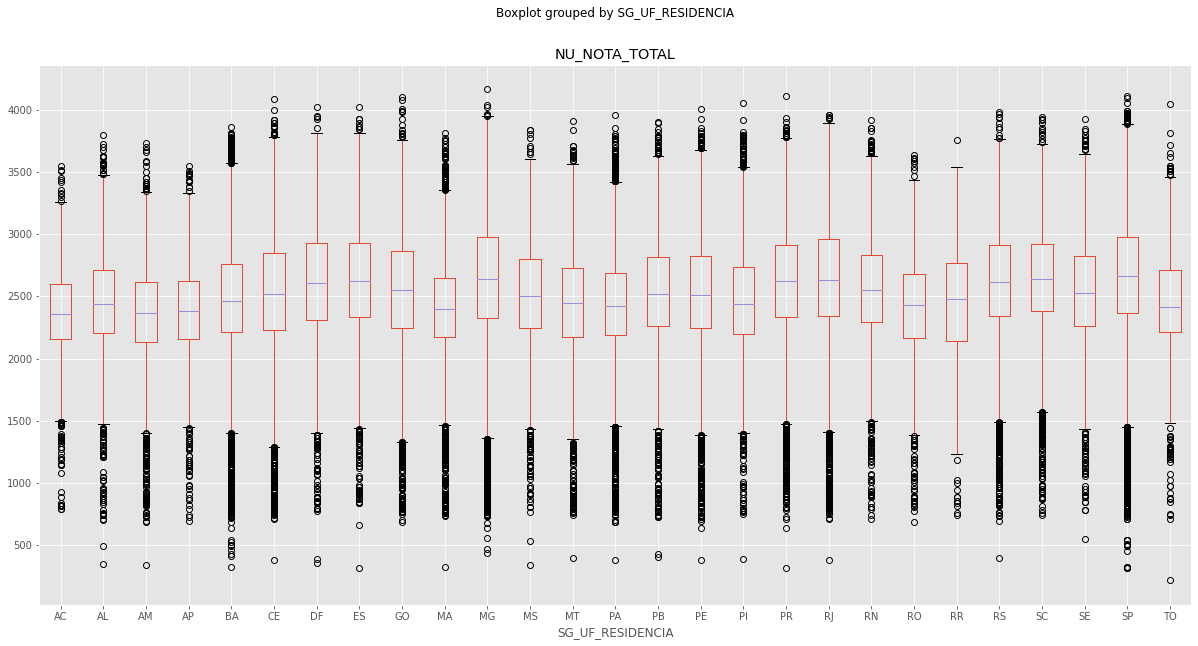

In [ ]:
# Traçar uma linha para a maior mediana
plt.style.use('ggplot')
data.boxplot(column='NU_NOTA_TOTAL', by='SG_UF_RESIDENCIA', figsize=(20, 10))

In [ ]:
#examLocSchool = exam.append("TP_LOCALIZACAO_ESC")
#x = data[exam]


In [ ]:
xUrb = data.query("TP_LOCALIZACAO_ESC == 1")
xUrb

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,1,1503606.0,Itaituba,15.0,PA,2,0,2,1.0,0,15152120.0,1503606.0,Itaituba,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEDBCBABDDBDCDDEECDEEEBECBCCDEBDACDDEAD...,EEBBACCDBAABCEDECEABCAEAEADEBBACCAADBCEBEADDB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,140.0,200.0,200.0,200.0,160.0,900.0,D,E,B,C,2,C,A,B,C,A,C,B,B,A,A,B,A,A,B,A,A,D,A,B,B,3301.4
19,190001005269,2019,1505809,Portel,15,PA,18,M,1,3,1,1505809.0,Portel,15.0,PA,2,0,2,1.0,0,15021564.0,1505809.0,Portel,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999EABCEABBCBEEAEECBDA.ACBEDDDCBDEBBCEBDCEED...,CEAECADADBABAECBDBCECDDACABEEBBAEAECDACDBECBD,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,40.0,40.0,120.0,20.0,340.0,B,D,B,B,4,C,A,B,A,A,A,B,B,B,A,A,A,A,B,B,A,C,A,A,A,2380.3
31,190001005747,2019,1504802,Monte Alegre,15,PA,20,M,1,3,1,1504802.0,Monte Alegre,15.0,PA,2,0,2,1.0,0,15007324.0,1504802.0,Monte Alegre,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BDCAADCBBCDDCACCDBCCBEEBAEBABAAADADECADEA...,DDCCABCBAAECDCAECBAAADEADBECBEEAAEEDEAAABEEEC,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,80.0,120.0,100.0,100.0,120.0,520.0,D,D,A,B,5,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2574.8
33,190001005812,2019,1502400,Castanhal,15,PA,18,F,1,3,1,1502400.0,Castanhal,15.0,PA,2,0,2,1.0,0,15045471.0,1502400.0,Castanhal,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999DCAEBDDEECEBCEBECACBDDEBCCADAAAEACCBCCCEB...,EEADACAEBACACEEECADAAAACAAEAAEDCBBBBCDAABCCBC,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,80.0,120.0,80.0,100.0,80.0,460.0,H,E,C,F,4,A,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,B,2220.3
39,190001006267,2019,1504703,Moju,15,PA,18,F,1,3,1,1504703.0,Moju,15.0,PA,2,0,3,NaN,0,15568873.0,1504703.0,Moju,15.0,PA,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CEAEABCBBBEDECEDCBCCEDAEBEBEBDAADABECBDCC...,DBCCCDECCBCBDACECBDDDDCBECCBECAAAEDCBDBABACDB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,120.0,120.0,120.0,120.0,580.0,A,B,F,F,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,2618.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
xRural = data.query("TP_LOCALIZACAO_ESC == 2")
xRural

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
65,190001007253,2019,1502202,Capanema,15,PA,17,F,1,1,1,1502202.0,Capanema,15.0,PA,2,0,2,1.0,0,15057283.0,1508035.0,Tracuateua,15.0,PA,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999DEACABEEBADBBACDAAEDABCECBAEECACDEEABCEDC...,DECADBDEDCADBECAEBCBECAEADBDEBECACBEACBEDACBE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,7.0,0.0,0.0,0.0,0.0,0.0,0.0,B,C,A,B,5,B,A,B,C,B,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A,1736.5
315,190001016692,2019,1504802,Monte Alegre,15,PA,17,M,1,3,1,1504802.0,Monte Alegre,15.0,PA,2,0,2,1.0,0,15169090.0,1504802.0,Monte Alegre,15.0,PA,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999DCBEDEEBBAEEDABBCABAAACAAAADCADCCEBAECACE...,DCECEADBDDDAACDCEBCADEDBACAEBDCADB*CDCCDAEEDB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,100.0,580.0,B,C,A,A,9,B,A,A,C,A,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,2275.2
1264,190001053269,2019,1504208,Marabá,15,PA,18,F,1,1,1,1504208.0,Marabá,15.0,PA,2,0,2,1.0,0,15169260.0,1504208.0,Marabá,15.0,PA,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CBDCBBCBBDCECDBDCCCBAABDBCACBADADCEECCACA...,DECCDADCBCCAECDCBCECDCDCDCBACBCDEDAACDCBDCACE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,100.0,40.0,40.0,100.0,40.0,320.0,B,B,B,B,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,2034.6
1634,190001066933,2019,1505486,Pacajá,15,PA,18,F,1,3,1,1505486.0,Pacajá,15.0,PA,2,0,2,1.0,0,15211053.0,1505486.0,Pacajá,15.0,PA,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,BCEED99999CBCDAECABACABEDEAABCBDCBAAADDBECBECA...,DECCABCACAEBDEBAABCACECBCABEADCECDBBABBBDEBCB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,180.0,160.0,180.0,160.0,840.0,E,E,B,B,7,E,A,B,D,A,A,B,A,B,A,A,A,A,B,A,A,E,A,A,B,2876.8
1856,190001075996,2019,1301852,Iranduba,13,AM,18,F,1,3,1,1301852.0,Iranduba,13.0,AM,2,0,2,1.0,0,13101030.0,1301852.0,Iranduba,13.0,AM,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,DBACE99999EBDACDADBEABEEBABCDCBCDBAACBDEADBEAA...,CDDDDBDCADDECAEDCDECABCCAEDCCACBBDDEBDDBDEABB,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,120.0,120.0,80.0,560.0,E,E,F,B,7,B,A,B,D,A,A,A,B,B,A,A,A,A,B,B,A,C,A,A,B,2306.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

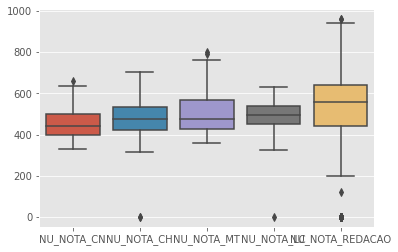

In [ ]:
xRural = xRural[exam]
sns.boxplot(data =xRural)


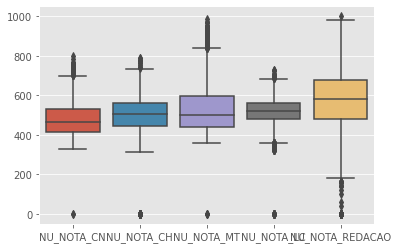

In [ ]:
xUrb = xUrb[exam]
sns.boxplot(data =xUrb)

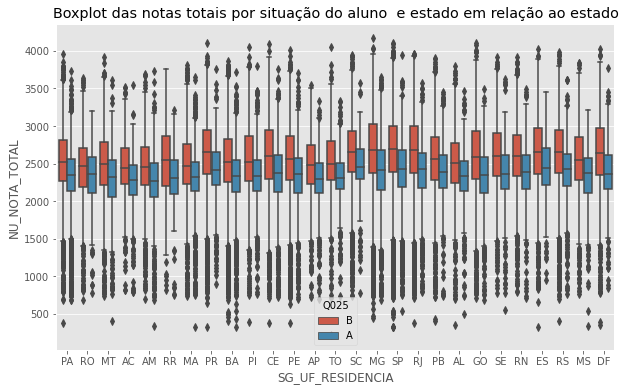

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Boxplot das notas totais por situação do aluno  e estado em relação ao estado")
sns.boxplot(x = "SG_UF_RESIDENCIA", y = "NU_NOTA_TOTAL", data =data, hue="Q025")

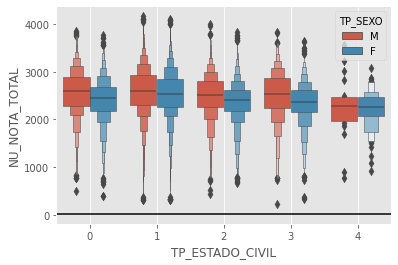

In [ ]:
sns.boxenplot(x='TP_ESTADO_CIVIL',y='NU_NOTA_TOTAL',data=data,hue='TP_SEXO')
plt.grid()
plt.axhline(20,color='black')
plt.show()

In [ ]:
exam.append("TP_SEXO")
x = data[exam]
x

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,TP_SEXO
0,435.6,512.3,432.4,488.6,420.0,M
1,NaN,409.3,NaN,375.3,400.0,M
2,423.2,499.1,427.2,441.0,560.0,F
3,426.2,578.1,499.9,551.5,500.0,F
4,516.5,571.3,424.5,511.2,780.0,F
...,...,...,...,...,...,...
127375,502.4,559.6,539.7,525.7,740.0,F
127376,449.1,380.9,418.2,450.3,520.0,M
127377,NaN,516.0,NaN,497.9,440.0,F
127378,564.7,416.2,455.7,517.3,620.0,F


In [ ]:
fig, axs = plt.subplots(2, figsize=(12,8))
fig.suptitle("Histograma da Nota Total x Gênero", fontsize='x-large')

sns.histplot(dados_sem_notas_zero, x='NU_NOTA_TOTAL', hue='TP_SEXO', stat='density', kde=True, ax=axs[0])
axs[0].set_title('Brasil')
axs[0].set_xlabel('')

sns.histplot(dados_estado, x = "NU_NOTA_TOTAL", hue='TP_SEXO', kde=True, stat="density", ax=axs[1])
axs[1].set_title('São Paulo')